# Task 1

2. Classify variables SalePrice, LotArea, HouseStyle, OverallQual, MSSubClass, YearBuilt by scales of measure-
ment; as qualitative or quantitative.

- SalePrice - quantitative, ratio. 
    - Has true zero
    - 300k house is twice as expensive as 150k house
- LotArea - quantitative, ratio.
    - Has true zero
    - 2000 sqft lot is twice as large as 1000 sqft lot
- HouseStyle - qualitative, somewhat nominal.
    - No natural ordering
    - We can consider 2 story house as "larger" than 1 story house, but this is not a strict ordering
- OverallQual - qualitative, ordinal.
    - Has natural ordering (1 to 10)
    - 8 quality is better than 6 quality, but we cannot say that 8 is twice as good as 4
- MSSubClass - qualitative, nominal.
    - No natural ordering
    - Just a code for different types of dwelling
- YearBuilt - quantitative, interval.
    - No true zero (year 0 does not mean absence of time)
    - 2000 is twice as new as 1000 is not meaningful

### 2. Plot SalesPrice histogram 

In [2]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Exploratory
df = pd.read_csv('data/AmesHousing.csv')

<Axes: xlabel='SalePrice', ylabel='Count'>

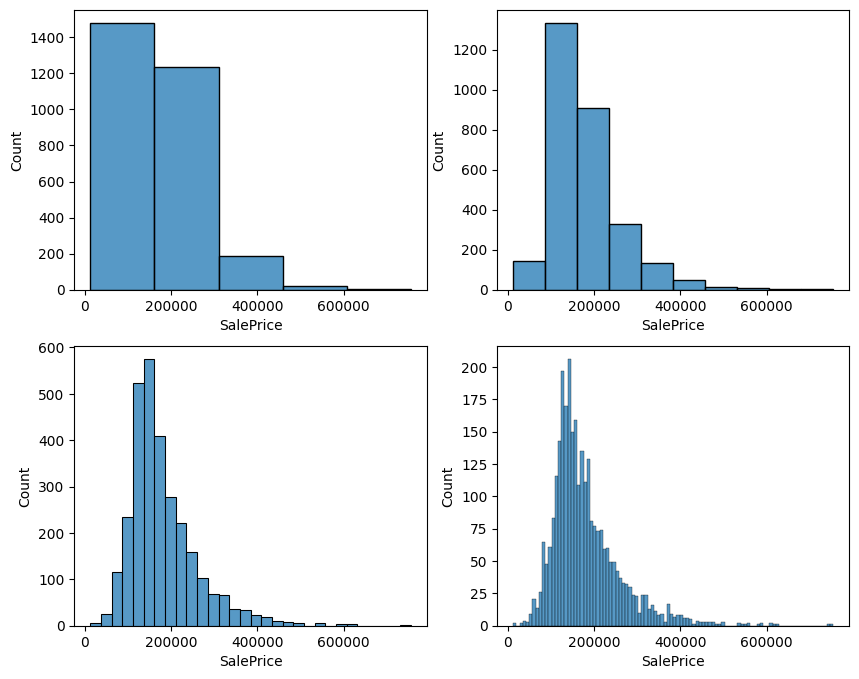

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df['SalePrice'], ax=axes[0,0], bins=5)
sns.histplot(data=df['SalePrice'], ax=axes[0,1], bins=10)
sns.histplot(data=df['SalePrice'], ax=axes[1,0], bins=30)
sns.histplot(data=df['SalePrice'], ax=axes[1,1], bins=100)

### Compute quantiles of levels 0.1,0.2,..., 0.9 for SalePrice.

In [5]:
for i in range(1, 10):
    print(f"Quantile {i/10}", "=", df['SalePrice'].quantile(i/10).round(3)) 

Quantile 0.1 = 105450.0
Quantile 0.2 = 124000.0
Quantile 0.3 = 135000.0
Quantile 0.4 = 146500.0
Quantile 0.5 = 160000.0
Quantile 0.6 = 178536.0
Quantile 0.7 = 199500.0
Quantile 0.8 = 230000.0
Quantile 0.9 = 281241.7


Conclusions that can be drawn from the quantiles:
- 10% of houses cost less than approximately $105,000, indicating a lower price range for a small portion of the market.
- 60% of houses cost less than approximately median price of $163,000, showing that half of the houses are priced below this value.

In [6]:
# SalesPrice Description
print("-------------------------")
print(df['SalePrice'].describe())

print("-------------------------")
print("Mode =", df['SalePrice'].mode()[0].round(3))
print("Span is =", (df['SalePrice'].max() - df['SalePrice'].min()).round(3))

# Variance and Standard Deviation
print("-------------------------")
print("Variance =", df['SalePrice'].var().round(3))
print("Standard Deviation =", df['SalePrice'].std().round(3))
print("Skewness =", df['SalePrice'].skew().round(3))
print("Kurtosis =", df['SalePrice'].kurtosis().round(3))

-------------------------
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64
-------------------------
Mode = 135000
Span is = 742211
-------------------------
Variance = 6381883615.688
Standard Deviation = 79886.692
Skewness = 1.744
Kurtosis = 5.119


# Task 3. Compare groups. (Team 2 is responsible for this task.)

## Task 1. Compute summary statistics for SalePrice for diﬀerent groups.

In [ ]:
# Let's do Summary statistics for each group
grouped = df.groupby('House Style')['SalePrice']
print("-------------------------")
print("House Style Group Summary Statistics:")
print(grouped.describe())

for group in grouped.groups:
    print(f"House Style: {group}")
    print(" Variance =", grouped.get_group(group).var().round(3))
    print(" Span is =", (grouped.get_group(group).max() - grouped.get_group(group).min()).round(3))
    print("Min and max values = ", grouped.get_group(group).min().round(3), grouped.get_group(group).max().round(3))
    print(" Standard Deviation =", grouped.get_group(group).std().round(3))
    print(" Skewness =", grouped.get_group(group).skew().round(3))
    print(" Kurtosis =", grouped.get_group(group).kurtosis().round(3))
    print("-------------------------")


-------------------------
House Style Group Summary Statistics:
              count           mean            std       min       25%  \
House Style                                                             
1.5Fin        314.0  137529.923567   47225.667545   37900.0  113000.0   
1.5Unf         19.0  109663.157895   20569.589488   64500.0   99850.0   
1Story       1481.0  178699.875084   81066.936614   12789.0  127000.0   
2.5Fin          8.0  220000.000000  118211.976671  104000.0  164250.0   
2.5Unf         24.0  177158.333333   76114.764132   97500.0  129125.0   
2Story        873.0  206990.159221   85349.912802   40000.0  154000.0   
SFoyer         83.0  143472.662651   31220.075418   70000.0  130000.0   
SLvl          128.0  165527.382812   34348.130088   91000.0  146950.0   

                  50%       75%       max  
House Style                                
1.5Fin       129675.0  149375.0  410000.0  
1.5Unf       113000.0  120000.0  139400.0  
1Story       155000.0  213750

## Task 2. Compute all dispersion measures.

In [ ]:
# Group your data by "House style"
grouped = df.groupby('House Style')['SalePrice']

print("-------------------------")
print("Hose Style Grouped Dispersion Measures:")
print(grouped.var())

-------------------------
Hose Style Grouped Dispersion Measures:
House Style
1.5Fin    2.230264e+09
1.5Unf    4.231080e+08
1Story    6.571848e+09
2.5Fin    1.397407e+10
2.5Unf    5.793457e+09
2Story    7.284608e+09
SFoyer    9.746931e+08
SLvl      1.179794e+09
Name: SalePrice, dtype: float64


## Task 3. Plot the boxplots for SalePrice for diﬀerent groups.

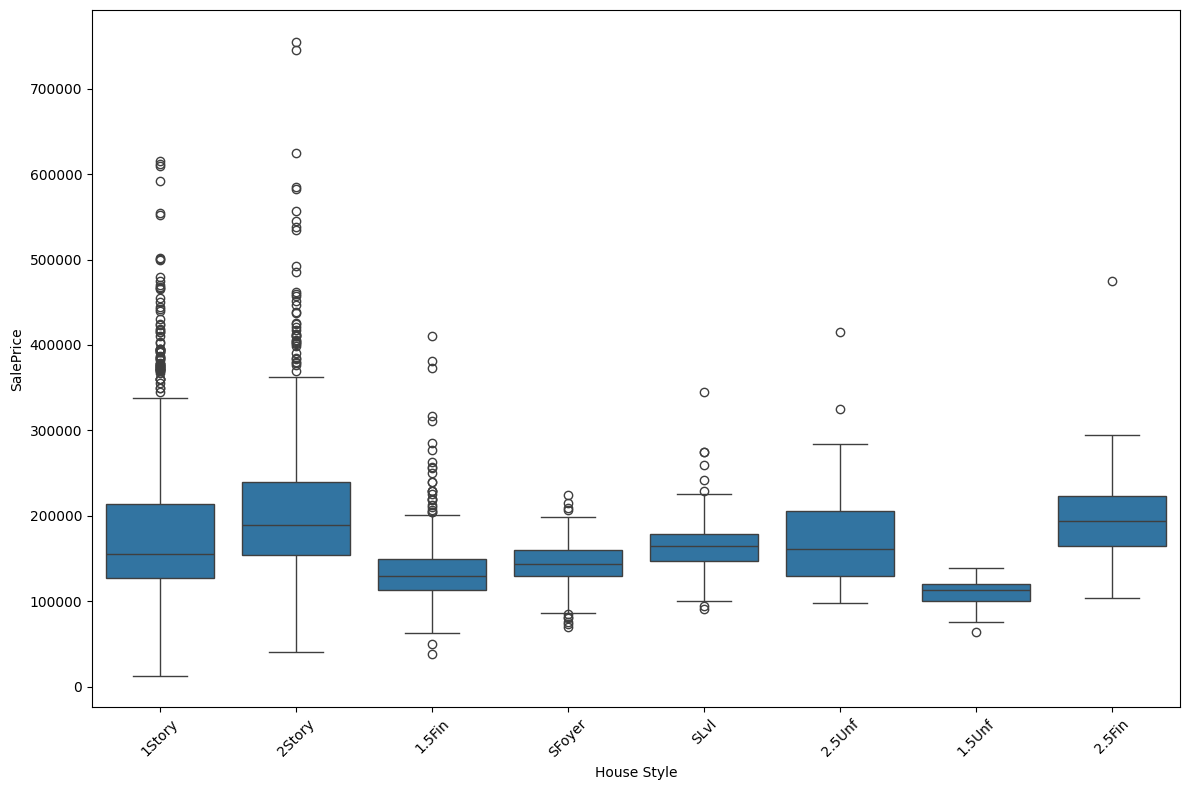

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='House Style', y='SalePrice')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Repeat for BldgType

In [ ]:
# Group your data by "Building Type"
grouped = df.groupby('Bldg Type')['SalePrice']

print("-------------------------")
print("BldgType Grouped Dispersion Measures:")
print(grouped.var())

-------------------------
BldgType Grouped Dispersion Measures:
Bldg Type
1Fam      6.859451e+09
2fmCon    9.665408e+08
Duplex    1.560169e+09
Twnhs     1.758874e+09
TwnhsE    4.381346e+09
Name: SalePrice, dtype: float64


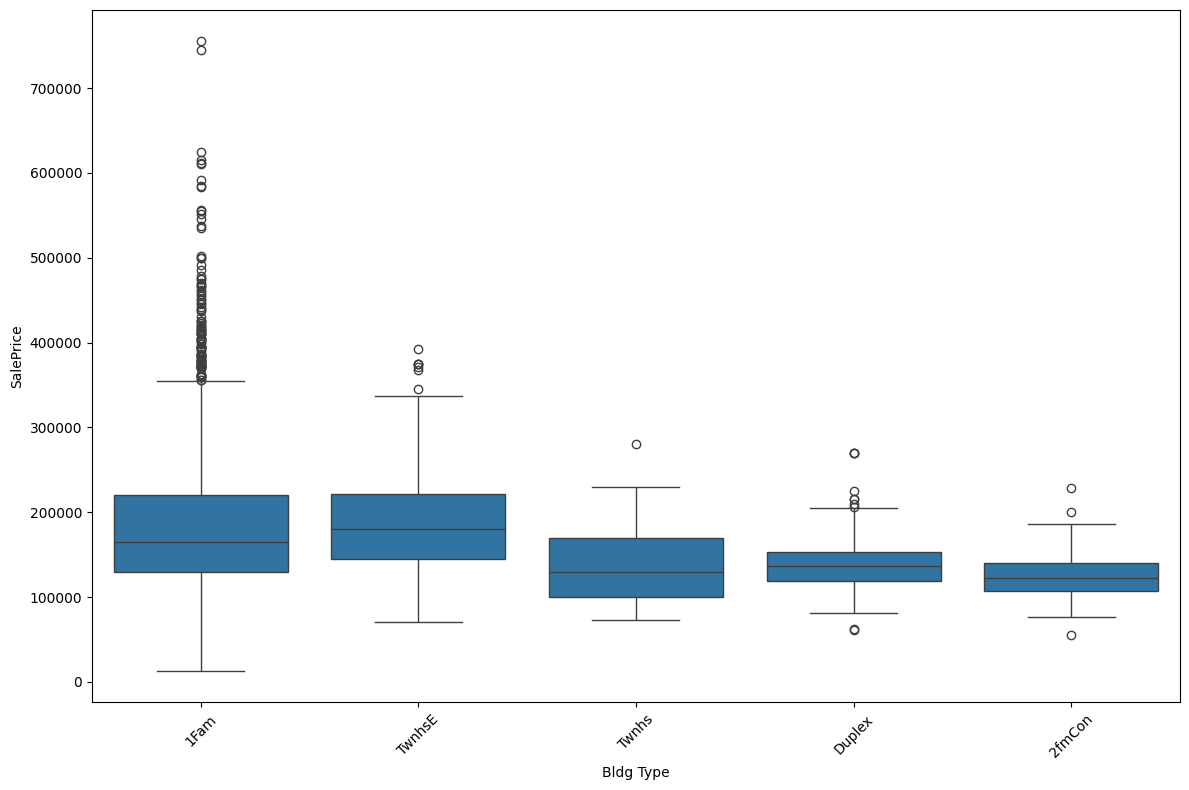

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Bldg Type', y='SalePrice')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
